# YZV211 - HW3 - Explatory Analysis & Statistical Inference

In this assignment, you will be proceeding with analysing your answers from the survey. **Read each question thoroughly, write the code for visualization and make an explanation if question asks for. Do not forget to read the assignment document!**

We first start by importing the necessary libraries for our homework.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('survey_v2.csv')
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Do you have to work to cover your living expenses?,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,How would you describe your regular diet?,"How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ?",Being good at Maths requires,Being good at Programming requires,Being good at Arts/Music requires,Being good at Sports requires
0,2.25,0,3.4,BA,12,No,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,AA,75,Yes,30,0,6,168,0,4,1,5,5,5,5
2,2.69,0,3.0,CB,120,No,20,5,1,10,10,3,1,3,3,5,3
3,0.00,0,3.5,AA,10,No,20,10,10,15,13,2,1,3,4,2,5
4,2.80,0,3.0,BB,10,No,10,10,15,5,10,4,1,2,3,1,1


## Q1.1) Just to keep the column names simple, please rename them here

You may need view the exact column names

In [62]:
# SEE THE COLUMN NAMES HERE
print(df.columns.values)

['GPA' 'Repeat_Course_Num' 'Expected_GPA' 'Expected_Letter_Grade'
 'Travel_Time' 'Do you have to work to cover your living expenses? '
 'Time_For_Study' 'Time_For_Hobbies' 'Time_For_Sports'
 'Time_For_Socializing' 'Time_For_Entertainment'
 'How would you describe your regular diet? '
 'How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ? '
 'Being good at Maths requires ' 'Being good at Programming requires '
 'Being good at Arts/Music requires ' 'Being good at Sports requires ']


Here we see the names of the columns in the dataframe.

In [63]:
# YOUR INPLACE COLUMN RENAMING FUNCTION
def rename(data_frame,column_name,new_name):
    exist = False
    for i in data_frame.columns.values:
        if i == column_name:
            exist = True
            index = data_frame.columns.get_loc(i)
            data_frame.rename(columns = {data_frame.columns[index]: new_name},inplace =True)
            break
    if not exist:
        print(f'there is no column with the name: {column_name}')
exact_column_names = df.columns.values
rename(df,'Do you have to work to cover your living expenses? ','Is_Working')
rename(df,'How would you describe your regular diet? ','Describe_Your_Diet')
rename(df,'How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ? ','Daily_Sugary_Drinks_Consume_Num')
rename(df,'Being good at Maths requires ','Math_Requires')
rename(df,'Being good at Programming requires ','Programming_Requires')
rename(df,'Being good at Arts/Music requires ','Art/Music_Requires')
rename(df,'Being good at Sports requires ','Sports_Requires')

This function takes 3 parameters. The first parameter is the name of the dataframe, the second parameter is the name of the column we want to change, and the third parameter is the new name of the column. If the column name to be changed exists in the dataframe, the function performs the rename operation.

In [64]:
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Describe_Your_Diet,Daily_Sugary_Drinks_Consume_Num,Math_Requires,Programming_Requires,Art/Music_Requires,Sports_Requires
0,2.25,0,3.4,BA,12,No,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,AA,75,Yes,30,0,6,168,0,4,1,5,5,5,5
2,2.69,0,3.0,CB,120,No,20,5,1,10,10,3,1,3,3,5,3
3,0.00,0,3.5,AA,10,No,20,10,10,15,13,2,1,3,4,2,5
4,2.80,0,3.0,BB,10,No,10,10,15,5,10,4,1,2,3,1,1


The first 5 rows of the data frame are displayed.

## Q1.2a) Apply mapping on the expected letter grades from string to floating point number

You may need to have a look at to our school's website to convert the letter grades from string to floating point number. In this regard, the grades should be appearing as AA --> 4.0, BA --> 3.5, DD --> 1.0, FF --> 0.0.

In [65]:
## FIRST WRITE A MAPPING FUNCTION, THEN APPLY IT ON THAT SPECIFIED COLUMN
def mapper(x: str) -> float:
    letter_grades_dict = {'AA':4,'BA':3.5,'BB':3,'CB':2.5,'CC':2,'CD':1.5,'DD':1,'FF':0,'VF':0}
    result = letter_grades_dict[x]
    return result
df['Expected_Letter_Grade'] = df['Expected_Letter_Grade'].apply(mapper)
df.head(2)

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Describe_Your_Diet,Daily_Sugary_Drinks_Consume_Num,Math_Requires,Programming_Requires,Art/Music_Requires,Sports_Requires
0,2.25,0,3.4,3.5,12,No,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,4.0,75,Yes,30,0,6,168,0,4,1,5,5,5,5


This function takes letter grade as a parameter. In the function, a dictionary containing the numerical equivalents of the letter grades is created. Then, the numerical value of the letter grade in the parameter is returned. By applying this function to the dataframe, the letter grades in the dataframe are replaced with their numerical values.

## Q1.2b) Apply mapping on the "Is_Working" column to represent it binary

"Yes" would correspond to a 1 whereas a "No" would correspond to a 0.

In [66]:
## CREATE A SIMILAR MAPPING FOR YES/NO TYPE OF ANSWERS
def mapper_binary(x: str) -> int:
    yes_no = {'Yes':1,'No':0}
    result = yes_no[x]
    return result
df['Is_Working']= df['Is_Working'].apply(mapper_binary)
df.head(2)

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Describe_Your_Diet,Daily_Sugary_Drinks_Consume_Num,Math_Requires,Programming_Requires,Art/Music_Requires,Sports_Requires
0,2.25,0,3.4,3.5,12,0,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,4.0,75,1,30,0,6,168,0,4,1,5,5,5,5


This function takes yes or no values in the 'Is_Working' column as a parameter. In the function, firstly, a dictionary containing the numerical equivalents of yes and no is created. Then, the numeric value of yes or no in the parameter is returned. By applying this function to the dataframe, the yes or no values are replaced with 1 and 0 numeric values.

In [67]:
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Describe_Your_Diet,Daily_Sugary_Drinks_Consume_Num,Math_Requires,Programming_Requires,Art/Music_Requires,Sports_Requires
0,2.25,0,3.4,3.5,12,0,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,4.0,75,1,30,0,6,168,0,4,1,5,5,5,5
2,2.69,0,3.0,2.5,120,0,20,5,1,10,10,3,1,3,3,5,3
3,0.00,0,3.5,4.0,10,0,20,10,10,15,13,2,1,3,4,2,5
4,2.80,0,3.0,3.0,10,0,10,10,15,5,10,4,1,2,3,1,1


The first 5 rows of the data frame are displayed.

# Q2) Describe Data

Try to express the features of the dataset by using 5-figure summary and mean & standard deviation statistics. Describe what you see down below.

A2)The 5-figure summary includes median, 1st Quartile (25th percentile), 3rd Quartile (75th percentile), minimum and maximum statistics.

In the table below, 'std' row is standard deviations, 'min' row is minimum values, 'max' row is maximum values, '25%' row is 1st Quartiles( 25th percentile), '75%' row is 3rd Quartiles( 75th percentile) , '50%' row shows median values

As seen in the table, the mean value of the 'Travel_Time' column is 41 and the standard deviaton is 35. These statistical data show us that students' 'travel_time' data can be very far from each other. This is better understood when we look at the minimum and maximum values in the table. The minimum value is 5, the maximum value is 120. So the maximum value is 24 times the minimum value.

If we look at the mean time students spend on activities, we can say that the most time is spent on socializing and the least time is on sports.

If we look at the 'GPA' column, we can say that a student with a GPA of 3.30 has a GPA higher than 75% of the students in the class, and a student with a GPA of 2.43 has a GPA higher than 25% of the students in the class.

In [68]:
## DESCRIBE THE DATASET
df.describe()

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Describe_Your_Diet,Daily_Sugary_Drinks_Consume_Num,Math_Requires,Programming_Requires,Art/Music_Requires,Sports_Requires
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.835625,0.562500,3.244375,3.510417,41.416667,0.083333,15.520833,10.312500,4.854167,16.208333,13.0000,2.812500,1.562500,3.125000,3.875000,2.541667,3.291667
std,0.677046,0.896951,0.314980,0.560106,35.925356,0.279310,11.268464,9.556453,3.798037,23.510033,13.5065,0.816225,0.896951,1.002656,0.841099,1.219667,1.090741
min,0.000000,0.000000,2.500000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.435000,0.000000,3.000000,3.500000,11.500000,0.000000,7.750000,5.000000,2.000000,7.000000,4.7500,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000
50%,2.940000,0.000000,3.250000,3.500000,22.500000,0.000000,15.000000,7.500000,4.000000,12.000000,10.0000,3.000000,1.000000,3.000000,4.000000,2.000000,3.000000
75%,3.302500,1.000000,3.500000,4.000000,75.000000,0.000000,20.000000,10.000000,7.250000,18.000000,15.0000,3.000000,2.000000,4.000000,4.000000,3.000000,4.000000
max,3.950000,3.000000,4.000000,4.000000,120.000000,1.000000,48.000000,50.000000,15.000000,168.000000,70.0000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


If we want to see the statistical data of the Dataframe as a table, we can use the 'describe' function as above. The value 'count' is excluded when calling the function above because it is not included in the 5-figure summary.

# Q3) Comment on the Data

Answer the following questions on the data while providing graphs as a way to support your answers.

Q3a) What is the ratio between the students who work and those who do not?

A3a): 91.6% of the students do not work, 8.3% are working.

In [69]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM
ratio = df['Is_Working'].value_counts(normalize=True)
print(f'ratio of working students: {ratio[0]}\nratio of no-working students: {ratio[1]}')

ratio of working students: 0.9166666666666666
ratio of no-working students: 0.08333333333333333


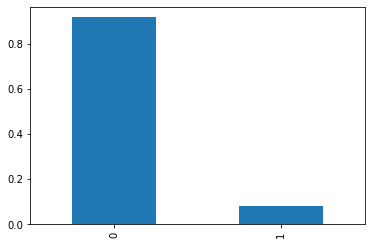

In [70]:
ratio.plot(kind='bar')
plt.show()

Q3b) What is the average of the Expected GPA? Also, is there any anomaly on its value distribution?

A3b): Average of the expected GPA is 3.244375. There is no anamoly on it is value distribution.

In [71]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM
average_expected_gpa = np.mean(df['Expected_GPA'])
print(f'Average of the expected GPA is {average_expected_gpa}')

Average of the expected GPA is 3.244375


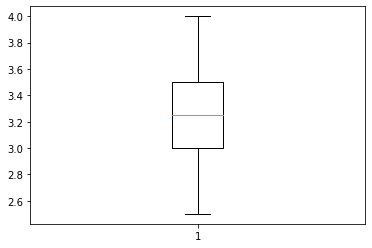

In [72]:
plt.boxplot(df['Expected_GPA'])
plt.show()

Q3c) What is the avergae of the Expected Letter Grade? Also, is there any anomaly on its value distribution?

A3c):Average of the expected letter grade is 3.51. Yes there are some anamolies on its value distribution.

In [73]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM
average_expected_grade = np.mean(df['Expected_Letter_Grade'])
print(f'Average of the expected letter grade is {average_expected_grade}')

Average of the expected letter grade is 3.5104166666666665


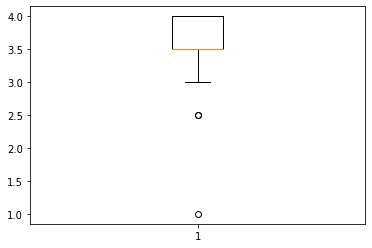

In [74]:
plt.boxplot(df['Expected_Letter_Grade'])
plt.show()

Q3d) Is there a strong correlation ($r_{xy} > 0.5 || r_{xy} < -0.5$) between the travel time and Expected Letter Grade? If so, what is the sample Pearson correlation coefficient?

A3d): There is no a strong correlation between the travel time and expected letter grade.Pearson Correlation Coefficient= 0.064 

In [75]:
def corr(x: pd.Series, y: pd.Series) -> float:
    r = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) * np.std(x) * np.std(y))
    return r
corr_coef = corr(df['Travel_Time'],df['Expected_Letter_Grade'])
print(f'Pearson Correlation Coefficient= {corr_coef}')

Pearson Correlation Coefficient= 0.06480851957470904


The result was found above using the correlation coefficient formula.

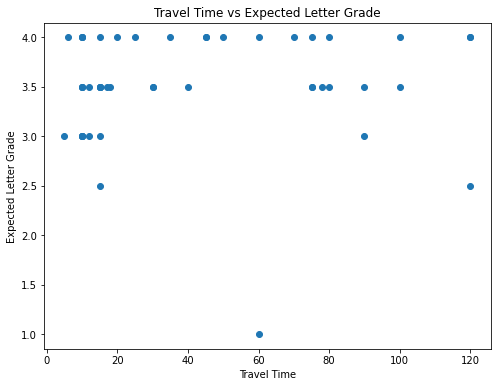

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(df['Travel_Time'],df['Expected_Letter_Grade'])
plt.xlabel('Travel Time')
plt.ylabel('Expected Letter Grade')
plt.title('Travel Time vs Expected Letter Grade')
plt.show()

Q3e) Define a threshold for travel time in which you will be able to group the individuals that are proximate and distant. Then, describe these groups to see which features have changed significantly and remained unchanged. Write the things that you noticed down below.

A3e): The changes I observed are as follows: 
1) As expected, the average travel time of the 'distant' group is higher. \
2) The average time spent by the students in the 'proximate' group for study, hobbies and sports is significantly higher.\
3) The average time spent by students in the 'distant' group for socializing and entertainment is higher.\
4) The standard deviation of the travel times of the students in the 'Distant' group is much higher.

In [77]:
# WRITE YOUR IMPLEMENTATION HERE!! 
TAU = 30
proximate = pd.DataFrame(df[df['Travel_Time'] <= 30 ])
distant = pd.DataFrame(df[df['Travel_Time'] > 30 ])

In [78]:
distant.describe()

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Describe_Your_Diet,Daily_Sugary_Drinks_Consume_Num,Math_Requires,Programming_Requires,Art/Music_Requires,Sports_Requires
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,3.017143,0.666667,3.286190,3.571429,76.571429,0.095238,13.238095,6.761905,3.666667,21.142857,14.238095,2.952381,1.761905,3.380952,4.000000,2.666667,3.428571
std,0.590848,0.912871,0.303488,0.712140,25.987634,0.300793,10.138564,3.986286,2.834314,34.415528,16.446595,0.864650,0.995227,1.071270,0.894427,1.425950,1.028175
min,2.000000,0.000000,3.000000,1.000000,35.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
25%,2.520000,0.000000,3.000000,3.500000,60.000000,0.000000,5.000000,5.000000,2.000000,8.000000,4.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000
50%,3.300000,0.000000,3.200000,4.000000,75.000000,0.000000,10.000000,6.000000,3.000000,15.000000,10.000000,3.000000,2.000000,4.000000,4.000000,2.000000,3.000000
75%,3.440000,1.000000,3.500000,4.000000,90.000000,0.000000,16.000000,10.000000,5.000000,20.000000,16.000000,4.000000,2.000000,4.000000,5.000000,3.000000,4.000000
max,3.950000,3.000000,4.000000,4.000000,120.000000,1.000000,45.000000,16.000000,10.000000,168.000000,70.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [79]:
proximate.describe()

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Describe_Your_Diet,Daily_Sugary_Drinks_Consume_Num,Math_Requires,Programming_Requires,Art/Music_Requires,Sports_Requires
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2.694444,0.481481,3.211852,3.462963,14.074074,0.074074,17.296296,13.074074,5.777778,12.370370,12.037037,2.703704,1.407407,2.925926,3.777778,2.444444,3.185185
std,0.716086,0.893152,0.325553,0.414310,6.244542,0.266880,11.957665,11.608770,4.227505,7.286173,10.931540,0.775332,0.797074,0.916764,0.800641,1.050031,1.144789
min,0.000000,0.000000,2.500000,2.500000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.405000,0.000000,3.000000,3.000000,10.000000,0.000000,10.000000,6.500000,2.000000,6.500000,5.500000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000
50%,2.740000,0.000000,3.300000,3.500000,12.000000,0.000000,16.000000,10.000000,5.000000,10.000000,10.000000,3.000000,1.000000,3.000000,4.000000,2.000000,3.000000
75%,3.115000,1.000000,3.500000,3.750000,15.000000,0.000000,20.000000,14.000000,9.000000,16.000000,13.000000,3.000000,1.500000,4.000000,4.000000,3.000000,4.000000
max,3.770000,3.000000,3.800000,4.000000,30.000000,1.000000,48.000000,50.000000,15.000000,30.000000,50.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000


Q3f) Define a threshold of $3.0$ for GPA and draw 3 plots side-by-side in which the x-axis is defined as the time for study and y-axis is chosen among time for hobbies, sports and socializing. Select an appropriate plot type for this task. Use green color to mark GPAs greater than or equal to $3.0$ and blue for GPAs lower than $3.0$. Do you notice any difference in preferences among these two segments? Do not forget to use a legend! 

A3f):Students with a low GPA spend more time doing sports, regardless of their study time.Regardless of GPA and working time, students spend less time on socialization, only students with a high GPA and a certain working time spend more time on socialization.

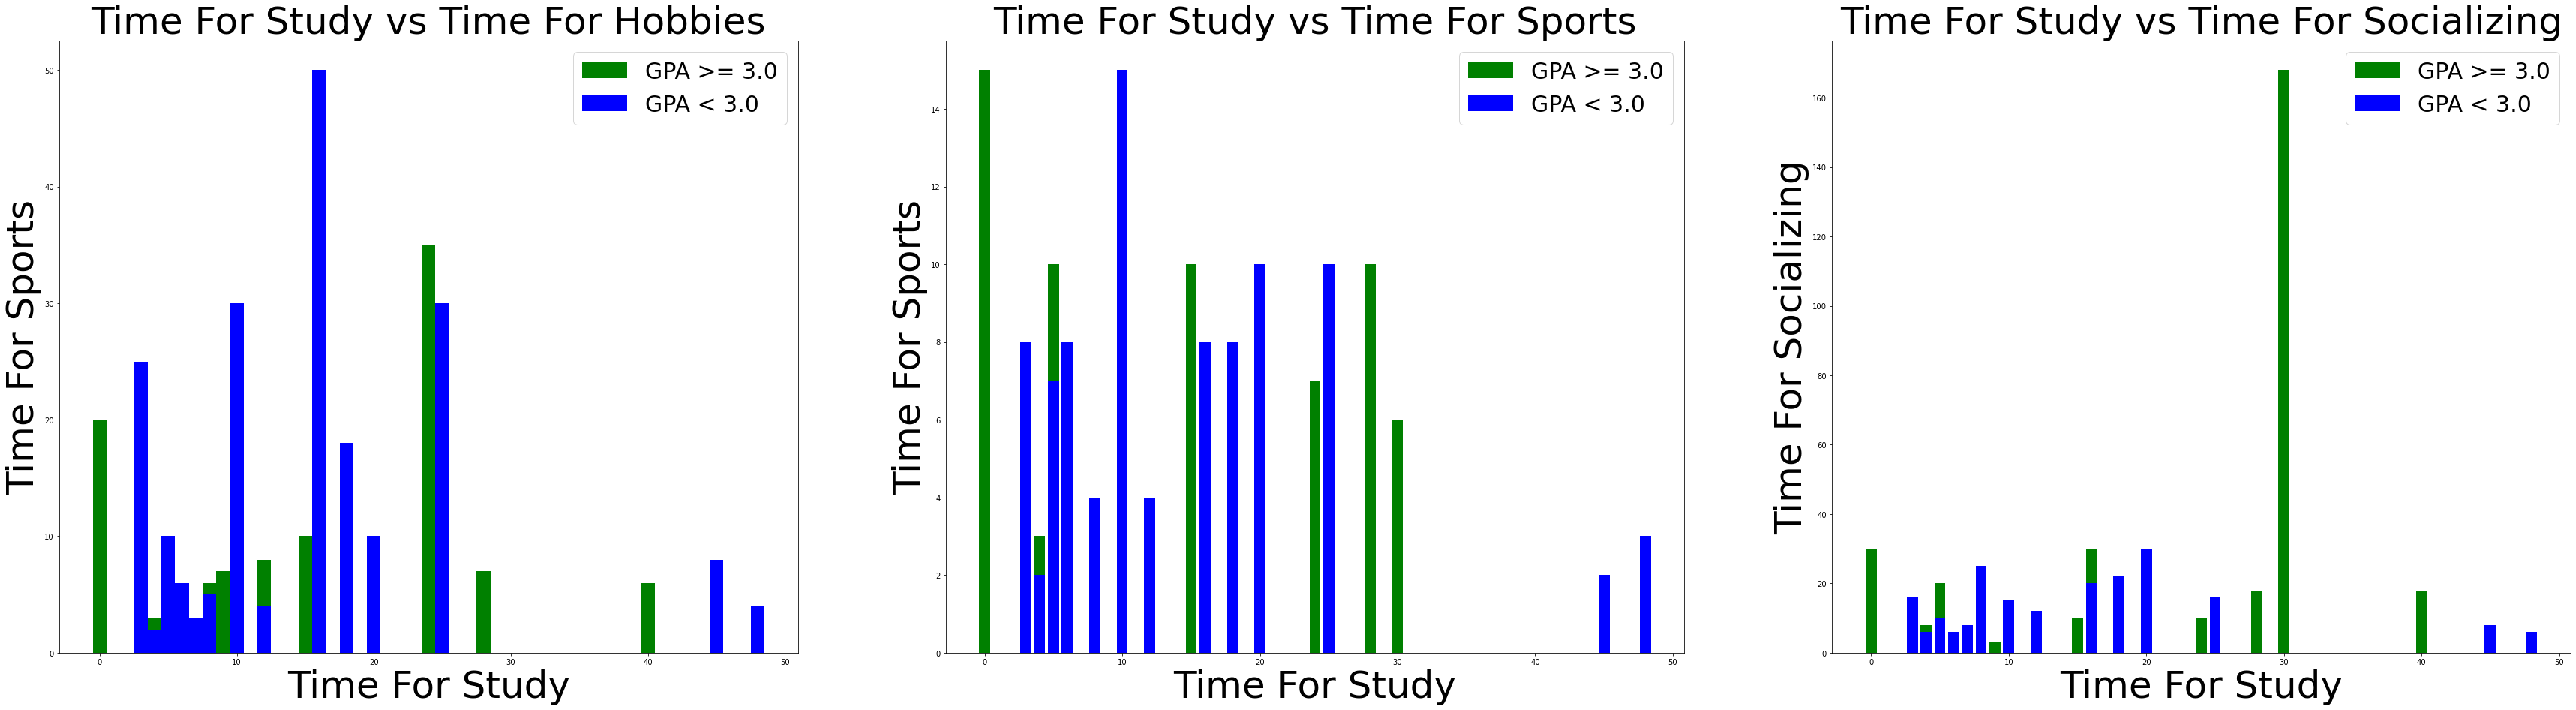

In [101]:
# WRITE YOUR IMPLEMENTATION HERE!! 
plt.figure(figsize=(60, 15))
plt.subplot(1, 3, 1)
plt.bar(df[df['GPA'] >= 3]['Time_For_Study'], df[df['GPA'] >= 3]['Time_For_Hobbies'], color='green',width=1)
plt.bar(df[df['GPA'] < 3]['Time_For_Study'], df[df['GPA'] < 3]['Time_For_Hobbies'], color='blue',width = 1)
plt.title('Time For Study vs Time For Hobbies',fontsize =50 )
plt.xlabel('Time For Study',fontsize =50 )
plt.ylabel('Time For Sports',fontsize =50 )
plt.legend(['GPA >= 3.0', 'GPA < 3.0'],prop={'size': 30})

plt.subplot(1, 3, 2)
plt.bar(df[df['GPA'] >=3]['Time_For_Study'], df[df['GPA'] >=3]['Time_For_Sports'], color='green')
plt.bar(df[df['GPA'] < 3]['Time_For_Study'], df[df['GPA'] < 3]['Time_For_Sports'], color='blue')
plt.title('Time For Study vs Time For Sports',fontsize =50 )
plt.xlabel('Time For Study',fontsize =50 )
plt.ylabel('Time For Sports',fontsize =50 )
plt.legend(['GPA >= 3.0', 'GPA < 3.0'],prop={'size': 30})

plt.subplot(1, 3, 3)
plt.bar(df[df['GPA'] >=3]['Time_For_Study'], df[df['GPA'] >=3]['Time_For_Socializing'], color='green')
plt.bar(df[df['GPA'] < 3]['Time_For_Study'], df[df['GPA'] < 3]['Time_For_Socializing'], color='blue')
plt.title('Time For Study vs Time For Socializing',fontsize =50 )
plt.xlabel('Time For Study',fontsize =50 )
plt.ylabel('Time For Socializing',fontsize =50 )
plt.legend(['GPA >= 3.0', 'GPA < 3.0'],prop={'size': 30})
plt.show()

Q3g) Use the same GPA threshold and group the data frame into two segments as in the previous part. Select an appropriate plot type for depicting the time used for studying, sports and social activities, hobbies, and entertainment. Please include a legend for highlighting the differences between these two segments, and write down below if there are any significant differences in the preference of spending time.

A3g:)While there are no students who spend a lot of time on sports among students with low GPA, there are students with high GPAs.

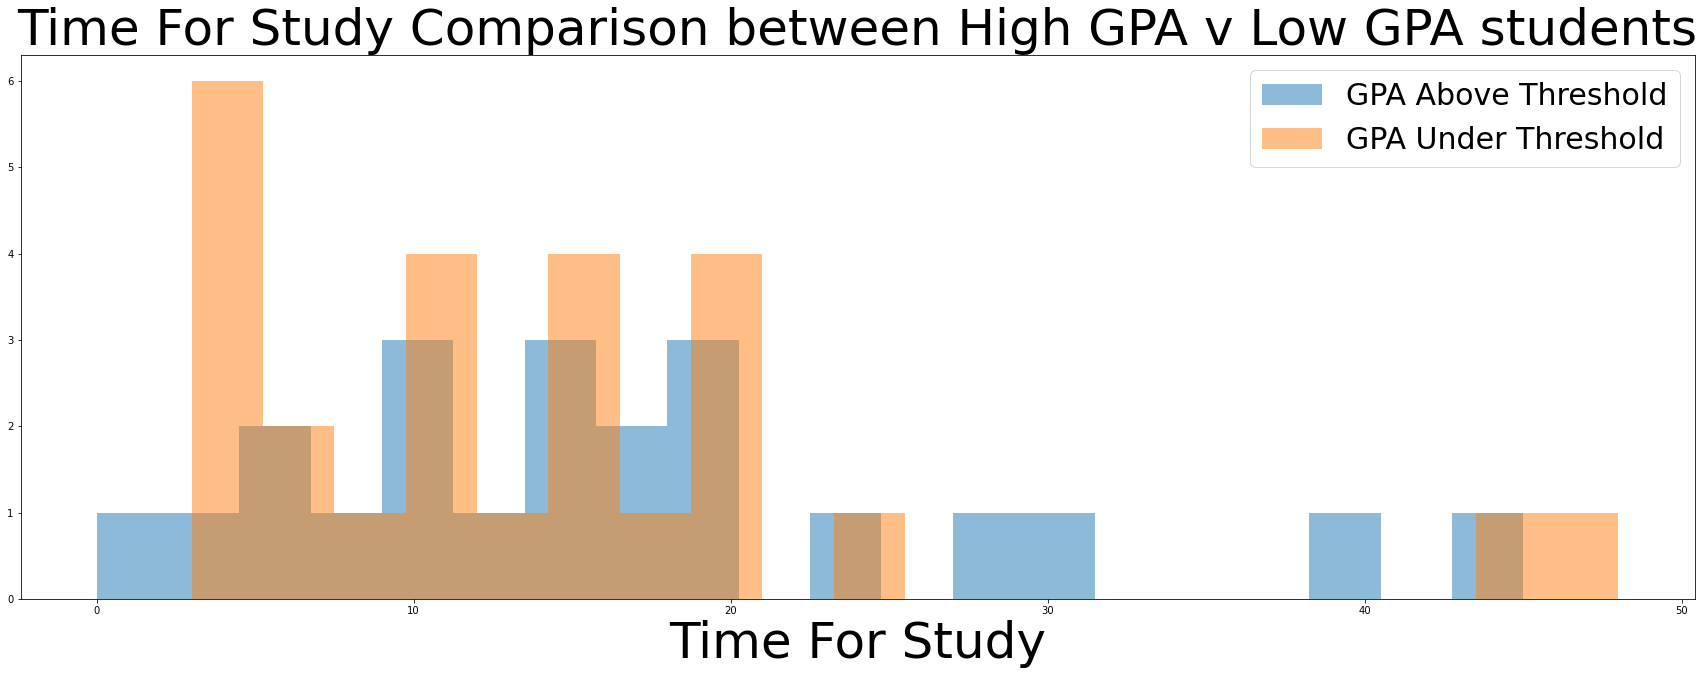

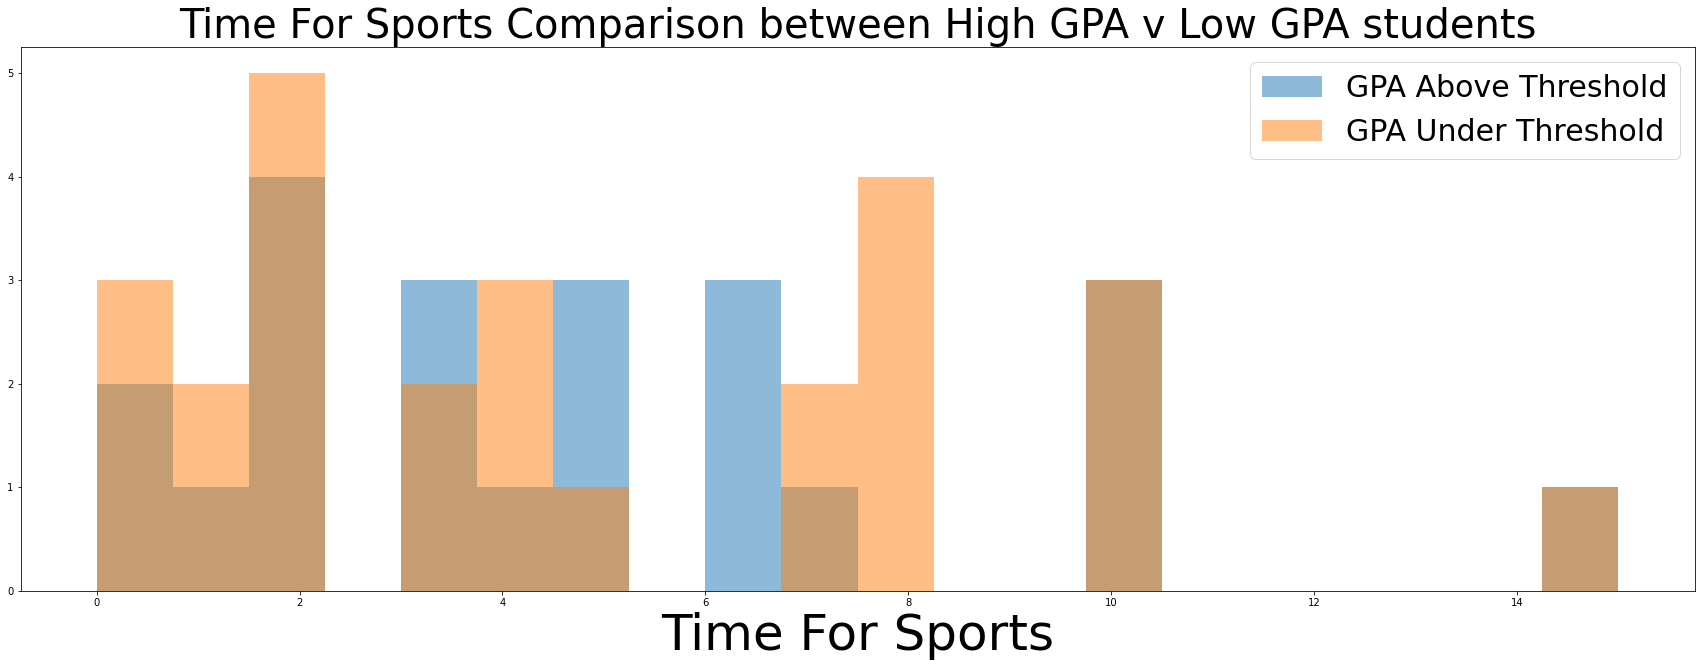

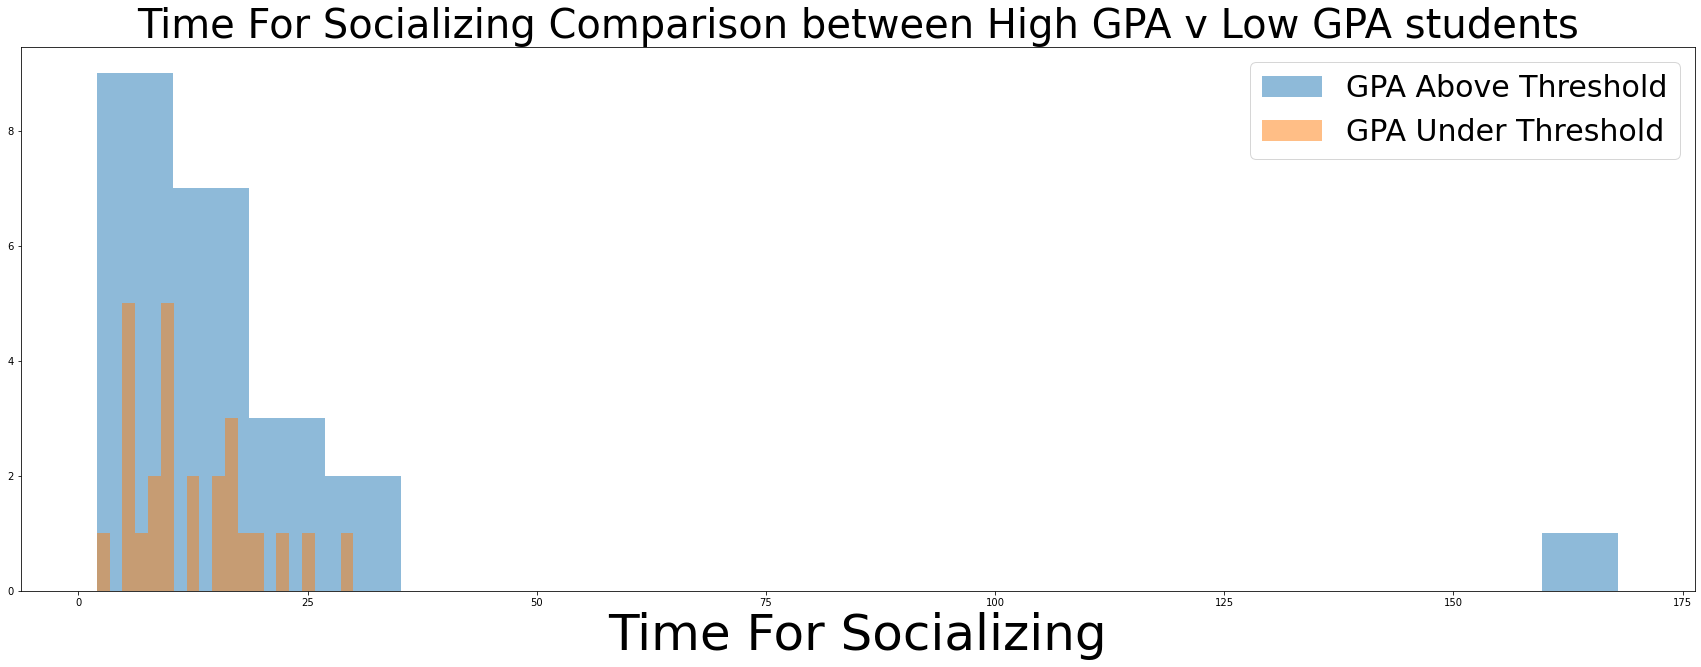

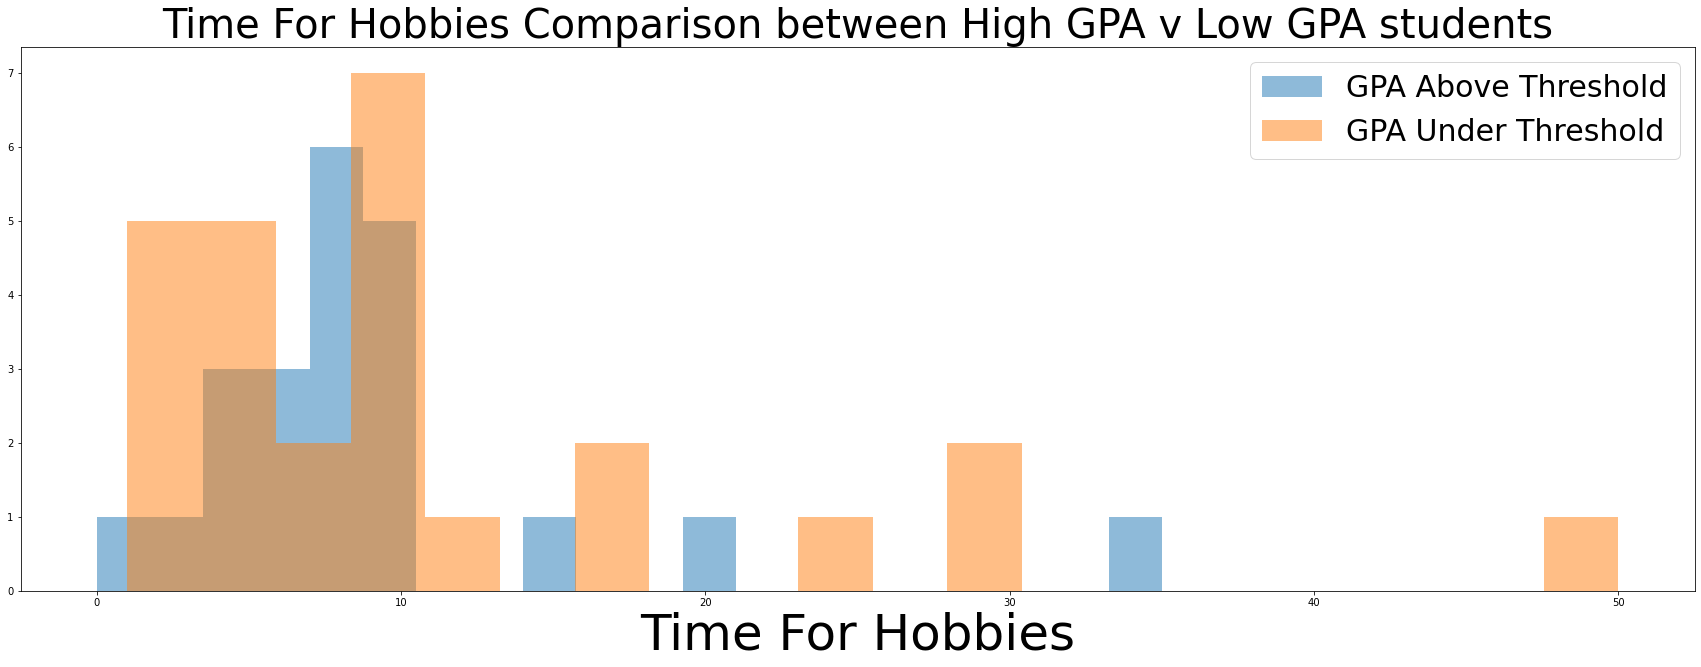

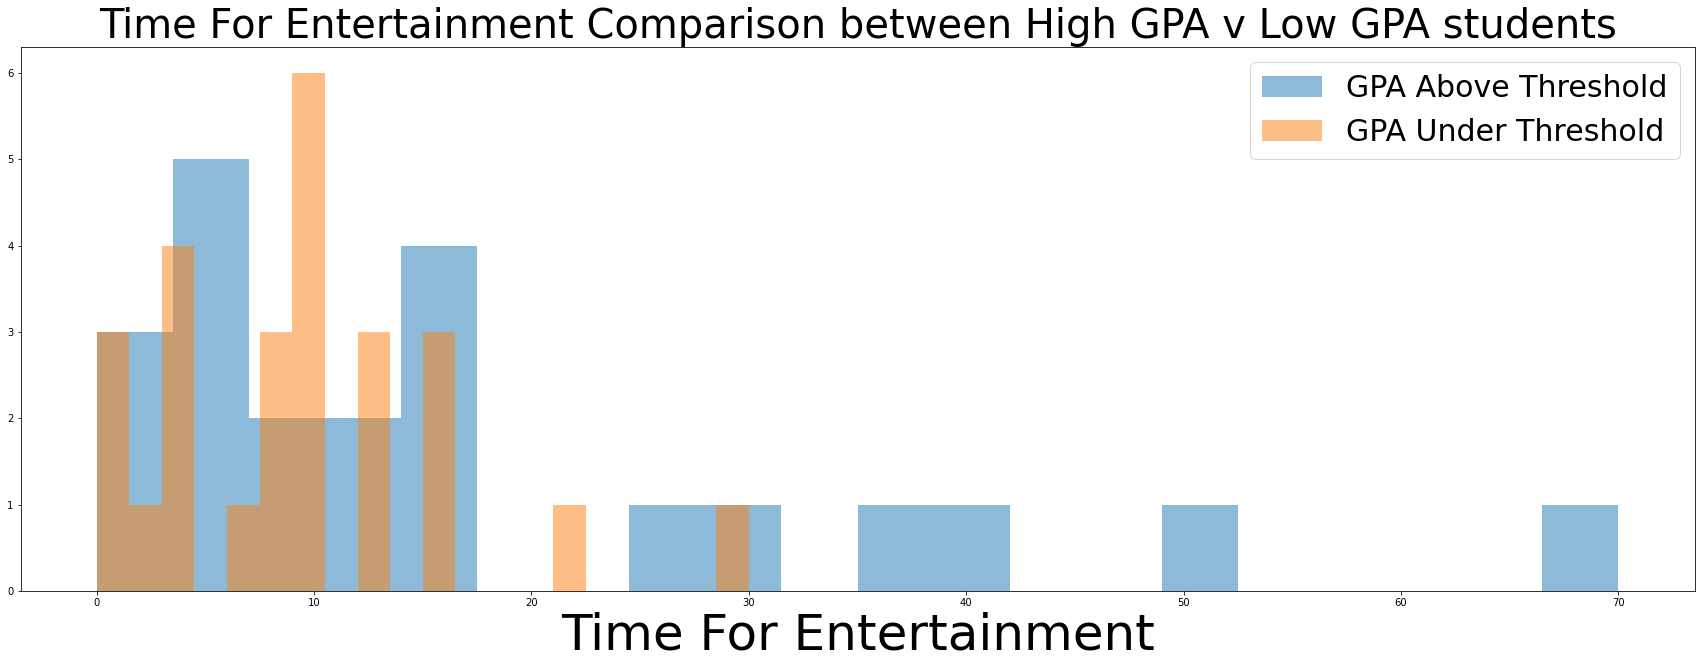

In [131]:
plt.figure(figsize=(30, 10))
plt.title('Time For Study Comparison between High GPA v Low GPA students',fontsize =50 )
plt.hist(df[df['GPA'] >= 3]['Time_For_Study'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Time_For_Study'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.xlabel('Time For Study',fontsize =50 )
plt.legend(loc='upper right',prop={'size': 30})

plt.figure(figsize=(30, 10))
plt.hist(df[df['GPA'] >= 3]['Time_For_Sports'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Time_For_Sports'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.xlabel('Time For Sports',fontsize =50 )
plt.title('Time For Sports Comparison between High GPA v Low GPA students',fontsize =40 )
plt.legend(loc='upper right',prop={'size': 30})

plt.figure(figsize=(30, 10))
plt.hist(df[df['GPA'] >= 3]['Time_For_Socializing'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Time_For_Socializing'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.title('Time For Socializing Comparison between High GPA v Low GPA students',fontsize =40 )
plt.xlabel('Time For Socializing',fontsize =50 )
plt.legend(loc='upper right',prop={'size': 30})

plt.figure(figsize=(30, 10))
plt.hist(df[df['GPA'] >= 3]['Time_For_Hobbies'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Time_For_Hobbies'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.title('Time For Hobbies Comparison between High GPA v Low GPA students',fontsize =40 )
plt.xlabel('Time For Hobbies',fontsize =50 )
plt.legend(loc='upper right',prop={'size': 30})

plt.figure(figsize=(30, 10))
plt.hist(df[df['GPA'] >= 3]['Time_For_Entertainment'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Time_For_Entertainment'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.title('Time For Entertainment Comparison between High GPA v Low GPA students',fontsize =40 )
plt.xlabel('Time For Entertainment',fontsize =50 )
plt.legend(loc='upper right',prop={'size': 30})

plt.show()

Q3h) Do the same experimentation as (Q3g) for identifying whether there is any difference between the segments in terms of the requirements for math, programming, arts/music and sports.

A3h:)The GPA of the students did not cause much difference in the answers given to these questions.

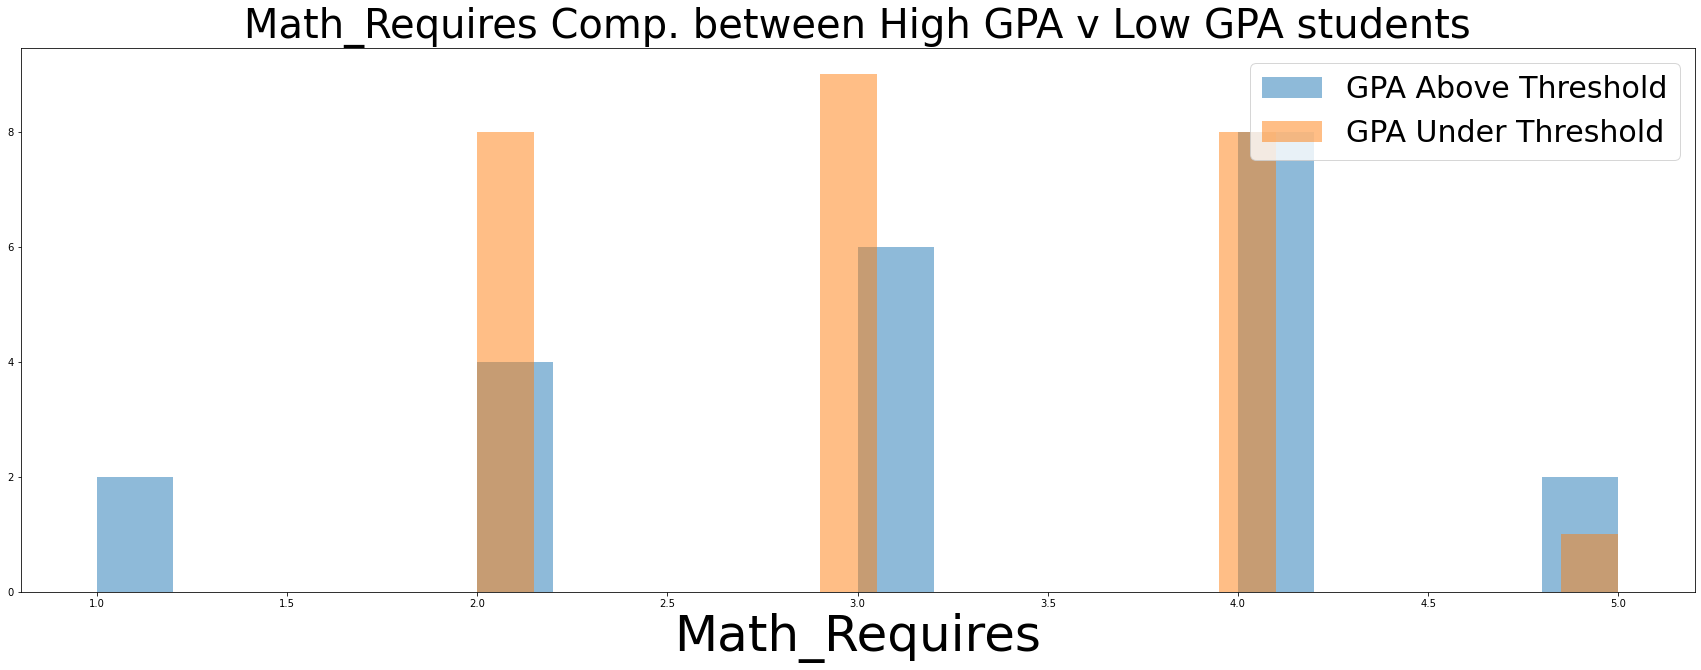

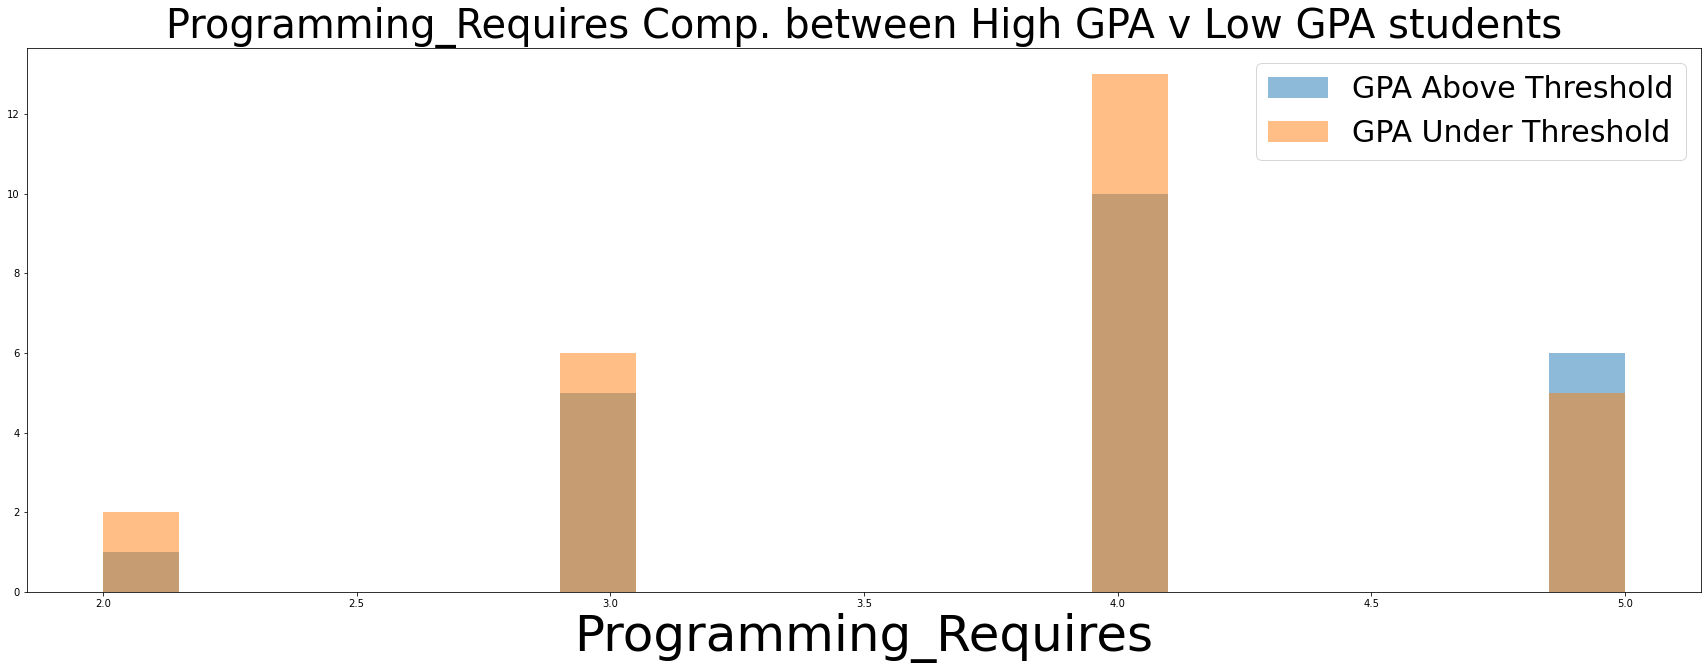

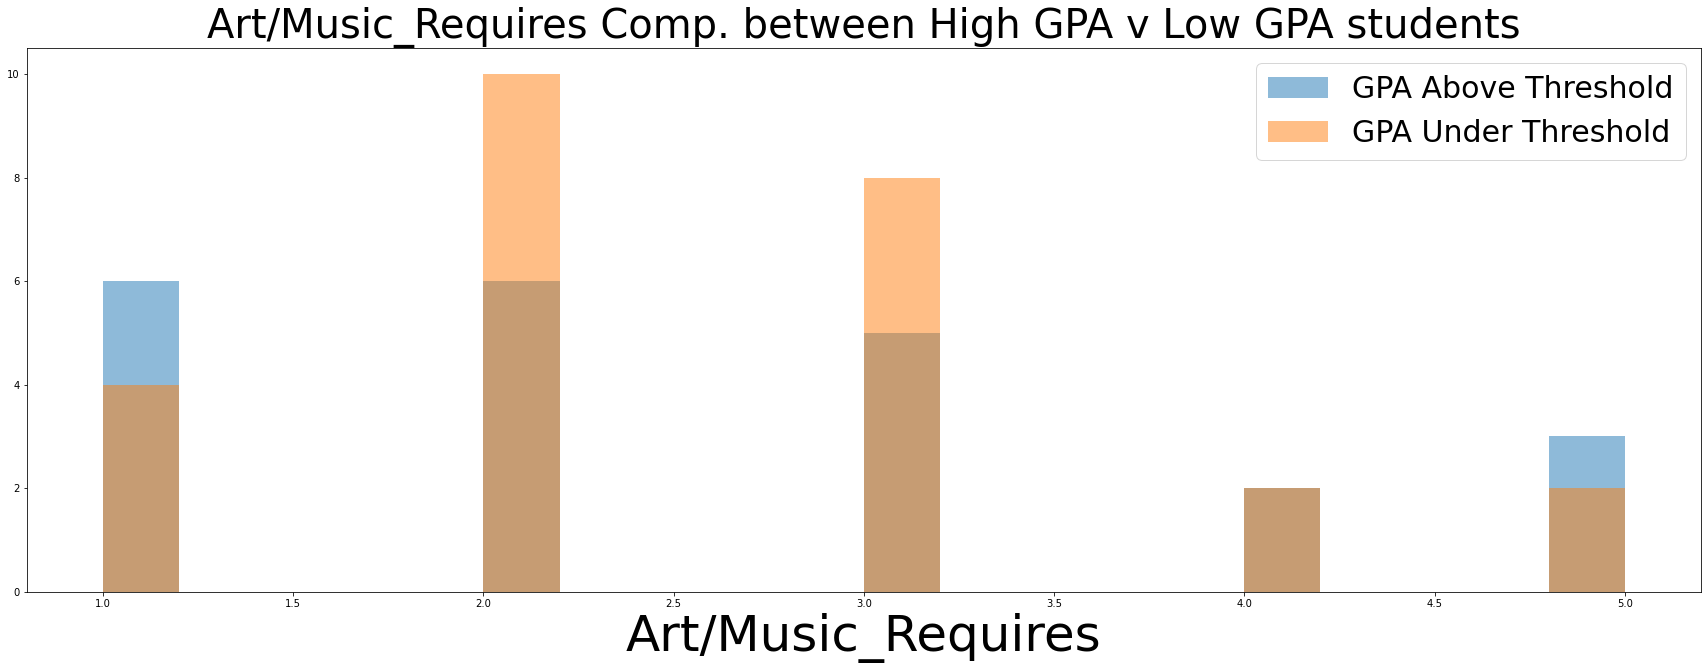

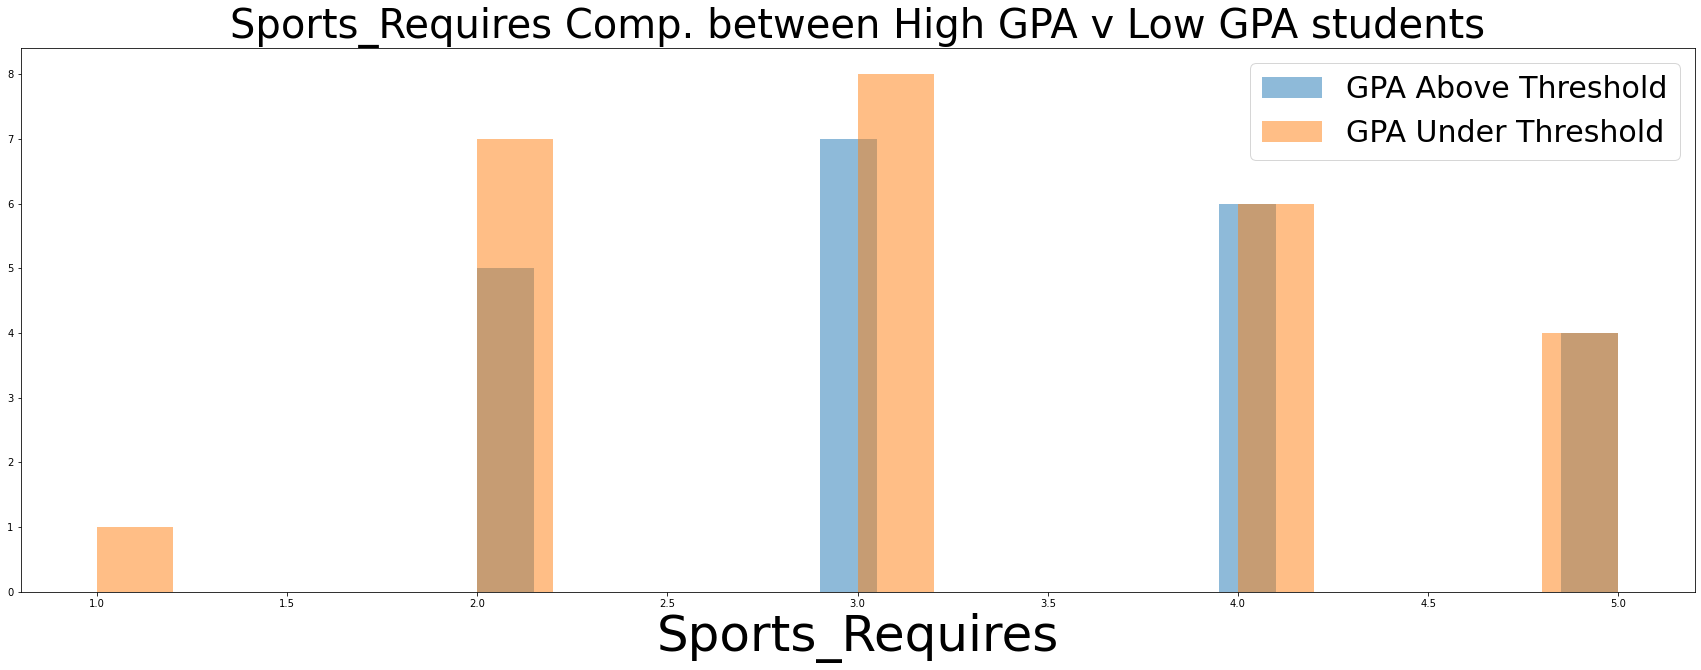

In [129]:
# WRITE YOUR IMPLEMENTATION HERE!! 
plt.figure(figsize=(30, 10))
plt.hist(df[df['GPA'] >= 3]['Math_Requires'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Math_Requires'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.title('Math_Requires Comp. between High GPA v Low GPA students',fontsize =40 )
plt.xlabel('Math_Requires',fontsize =50)
plt.legend(loc='upper right',prop={'size': 30})

plt.figure(figsize=(30, 10))
plt.hist(df[df['GPA'] >= 3]['Programming_Requires'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Programming_Requires'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.title('Programming_Requires Comp. between High GPA v Low GPA students',fontsize =40 )
plt.xlabel('Programming_Requires',fontsize =50)
plt.legend(loc='upper right',prop={'size': 30})

plt.figure(figsize=(30, 10))
plt.hist(df[df['GPA'] >= 3]['Art/Music_Requires'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Art/Music_Requires'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.title('Art/Music_Requires Comp. between High GPA v Low GPA students',fontsize =40 )
plt.xlabel('Art/Music_Requires',fontsize =50)
plt.legend(loc='upper right',prop={'size': 30})

plt.figure(figsize=(30, 10))
plt.hist(df[df['GPA'] >= 3]['Sports_Requires'], bins=20, alpha=0.5, label='GPA Above Threshold')
plt.hist(df[df['GPA'] < 3]['Sports_Requires'], bins=20, alpha=0.5, label='GPA Under Threshold')
plt.title('Sports_Requires Comp. between High GPA v Low GPA students',fontsize =40 )
plt.xlabel('Sports_Requires',fontsize =50)
plt.legend(loc='upper right',prop={'size': 30})


plt.show()

# Q4) Covariance/Correlation Matrices 

Q4a) Find the covariance and correlation matrices of the variables, and plot them on a good-looking heatmap. You can use the pandas/sklearn functions for this task. Comment on your results.

In [83]:
# WRITE YOUR IMPLEMENTATION HERE!! 

corr_matrix = df.corr()
cov_matrix = df.cov()

Correlation and covariance matrices were found above.

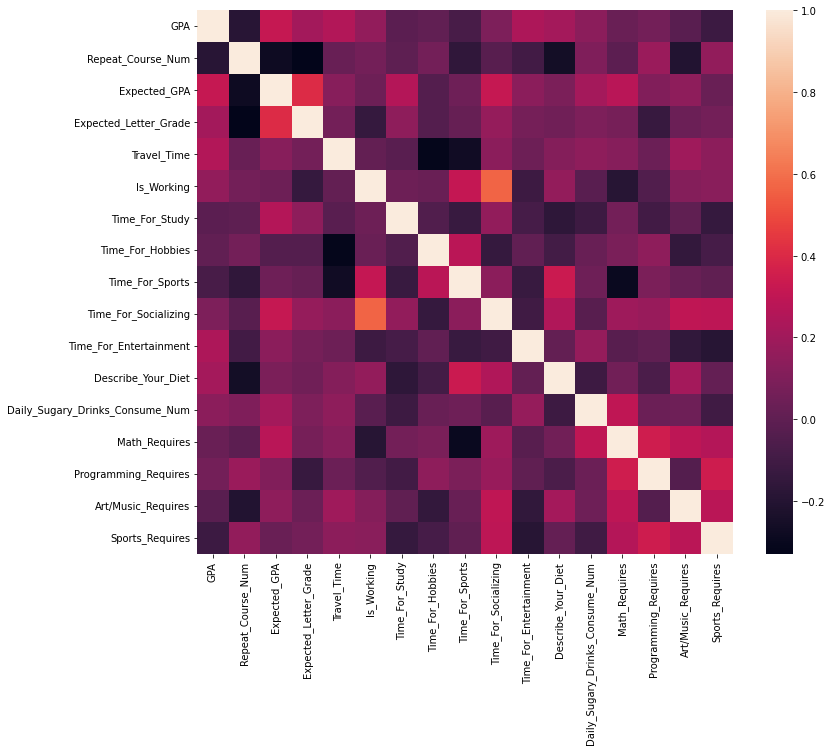

In [84]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, ax=ax)
plt.show()

In the above correlation matrix, the weak correlation between 'Expected_GPA' and 'Repeat_Course_Num' is striking, also the correlation between 'Travel_Time' and 'Time_For Hobbies' is very weak. There is a strong relationship between 'Socializing_Time' and 'Is_Working'.

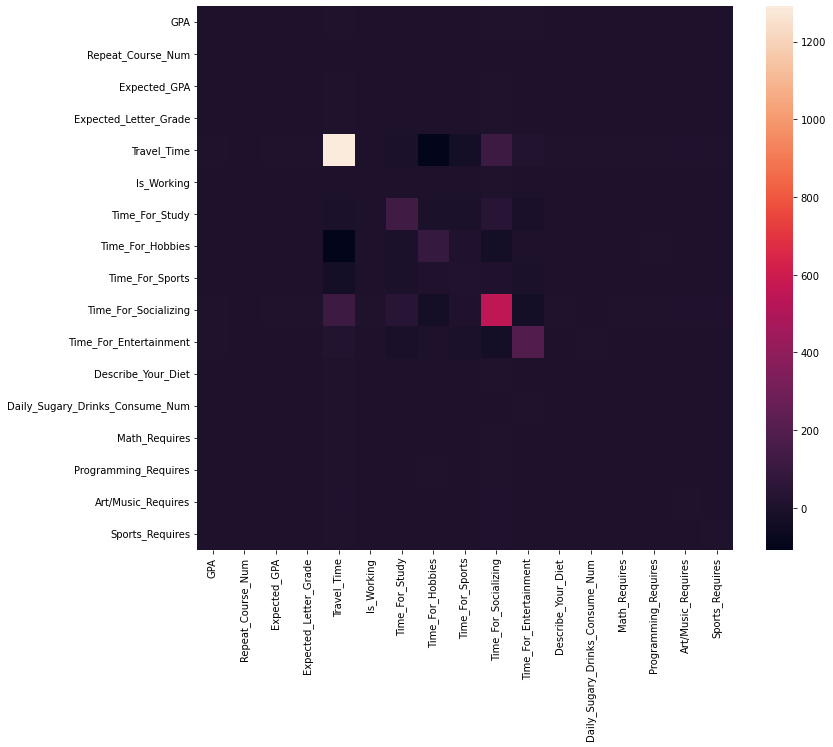

In [85]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cov_matrix, ax=ax)
plt.show()

The covariance value is positive if there is an increasing relationship between the variables, negative if there is a decreasing relationship, and 0 if there is no relationship. In the covariance matrix, the mutual covariance values of these variables exist.By looking at the heatmap, we can say that most of the covariation values are positive.

Q4b) Based on the correlation matrix, which of the variables are strongly ($r_{xy} > 0.5 || r_{xy} < -0.5$) correlated? Which variable tuple has the highest (anti)correlation?

In [86]:
corr_matrix

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Describe_Your_Diet,Daily_Sugary_Drinks_Consume_Num,Math_Requires,Programming_Requires,Art/Music_Requires,Sports_Requires
GPA,1.000000,-0.189260,0.318668,0.208839,0.256798,0.158360,-0.015759,0.003406,-0.076790,0.092985,0.241721,0.214861,0.136925,0.030911,0.063283,-0.021547,-0.119819
Repeat_Course_Num,-0.189260,1.000000,-0.280011,-0.329543,0.026907,0.063695,-0.006447,0.063451,-0.162776,-0.027873,-0.098351,-0.259740,0.100826,-0.008872,0.179790,-0.206643,0.154952
Expected_GPA,0.318668,-0.280011,1.000000,0.404954,0.126133,0.041718,0.257468,-0.037149,0.046253,0.319633,0.135583,0.090154,0.211761,0.275796,0.102496,0.147112,0.031507
Expected_Letter_Grade,0.208839,-0.329543,0.404954,1.000000,0.064809,-0.141669,0.145763,-0.036396,0.020733,0.165448,0.067499,0.050903,0.093966,0.073404,-0.132667,0.038283,0.064574
Travel_Time,0.256798,0.026907,0.126133,0.064809,1.000000,0.009188,-0.020625,-0.315088,-0.269779,0.133081,0.039245,0.112285,0.145098,0.120202,0.039079,0.197226,0.140721
Is_Working,0.158360,0.063695,0.041718,-0.141669,0.009188,1.000000,0.039997,0.029892,0.312548,0.567562,-0.112798,0.163322,-0.021232,-0.189934,-0.045283,0.114503,0.128037
Time_For_Study,-0.015759,-0.006447,0.257468,0.145763,-0.020625,0.039997,1.000000,-0.045999,-0.127444,0.153943,-0.081920,-0.164966,-0.115911,0.060025,-0.100738,-0.000839,-0.140722
Time_For_Hobbies,0.003406,0.063451,-0.037149,-0.036396,-0.315088,0.029892,-0.045999,1.000000,0.282072,-0.141021,0.004286,-0.093253,0.026218,0.082437,0.145256,-0.149913,-0.080372
Time_For_Sports,-0.076790,-0.162776,0.046253,0.020733,-0.269779,0.312548,-0.127444,0.282072,1.000000,0.133308,-0.128162,0.334157,0.049574,-0.296818,0.087417,0.026601,0.000214
Time_For_Socializing,0.092985,-0.027873,0.319633,0.165448,0.133081,0.567562,0.153943,-0.141021,0.133308,1.000000,-0.102383,0.247116,-0.024846,0.190224,0.176729,0.297235,0.290468


In [87]:
corr_strong = corr_matrix[corr_matrix.abs() > 0.5]
corr_strong = corr_strong[corr_strong.abs() != 1]
corr_strong = corr_strong.dropna(how = 'all',axis = 1)
corr_strong = corr_strong.dropna(how = 'all',axis = 0)
corr_strong = corr_strong.fillna(value=1)
corr_strong

,Is_Working,Time_For_Socializing
Is_Working,1.000000,0.567562
Time_For_Socializing,0.567562,1.000000


Above, the correlation matrix was filtered to include correlations greater than 0.5 or less than -0.5.As seen above, Is_Working and Time_For_Socializing variables are strongly correlated.(Is_Working,Time_For_Socializing) tuple has the highest correlation.

# Q5) Hypothesis Testing

Select an appropriate test name and type for the hypothesis questions below and provide the p-value as well while defining the significance. You may want to use SciPy here.

Q5a) Do working students study less than their non-working counterparts?

In [88]:
import scipy.stats as stats
working_students = df[df['Is_Working'] == 1]
non_working_students = df[df['Is_Working'] == 0]
t,p = stats.ttest_ind(working_students['Time_For_Study'], non_working_students['Time_For_Study'],\
                      equal_var=True)
print(f'p-value = {p}')

p-value = 0.7872286833893175


Here, t-test was applied to determine whether the mean of the time spent by working and non-working students was statistically different.P-value is the probability that the difference between the means is by chance. And here, p-value is 0.78 Conclusion: There is no significant difference in the time spent studying between working students and non-working students.

Q5b) Do students having lower GPA tend to believe intelligence is more key for programming?

In [89]:
low_gpa_students = df[df['GPA'] < 3]
high_gpa_students = df[df['GPA'] >= 3]
t,p = stats.ttest_ind(low_gpa_students['Programming_Requires'],\
                      high_gpa_students['Programming_Requires'],equal_var=True)
print(f'p-value = {p}')

p-value = 0.5523834569323245


Here, t-test was applied to determine whether the mean of 'Programming_Requirement' column for students with more study time and students with less study time was statistically different. P-value is the probability that the difference between the means is by chance. And here, p-value is 0.55 Conclusion: 
Students with low GPA not tend to believe intelligence is more key for programming

Q5c) Do students who spend more time studying tend to expect higher letter grades from the course?

In [90]:
high_study_time_students =  df[df['Time_For_Study'] > 10]
low_study_time_students =  df[df['Time_For_Study'] <= 10]
t,p = stats.ttest_ind(high_study_time_students['Expected_Letter_Grade'],\
                      low_study_time_students['Expected_Letter_Grade'],equal_var=True)
print(f'p-value = {p}')

p-value = 0.25336434143027364


Here, t-test was applied to determine whether the mean of letter grades expected by students with more study time and students with less study time are statistically different.P-value is the probability that the difference between the means is by chance. And here, p-value is 0.25 Conclusion: Students who spend more time studying do not tend to expect higher letter grades from the course.